### Import Libraries
Import TensorFlow for model development, NumPy for data generation, and Matplotlib for visualizations.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic Dataset
Create noisy quadratic data to simulate a non-linear regression problem.


In [2]:
# Generate synthetic data (non-linear regression problem)
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 data points
y = (X**2 + np.random.randn(100, 1) * 0.1).astype(np.float32)  # Quadratic function with noise

### Define Model using Functional API
Build a 3-layer neural network using TensorFlow’s Functional API. Includes two hidden layers with ReLU activation.


In [3]:
# Define the model using TensorFlow's Functional API
inputs = tf.keras.Input(shape=(1,))
x = tf.keras.layers.Dense(5, activation='relu')(inputs)  # First hidden layer
x = tf.keras.layers.Dense(5, activation='relu')(x)  # Second hidden layer
outputs = tf.keras.layers.Dense(1)(x)  # Output layer

model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [4]:
# Print model architecture summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

### Train the Model
Train the model for 1000 epochs. A custom callback prints training loss every 100 epochs.


In [7]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 100 == 0:  # Print loss every 100 epochs
            print(f"Epoch {epoch}: Loss = {logs.get('loss')}")

history = model.fit(X, y, epochs=1000, verbose=0, callbacks=[LossHistory()])

Epoch 0: Loss = 0.007805230561643839
Epoch 100: Loss = 0.008405259810388088
Epoch 200: Loss = 0.008121747523546219
Epoch 300: Loss = 0.007936904206871986
Epoch 400: Loss = 0.007677509915083647
Epoch 500: Loss = 0.008703621104359627
Epoch 600: Loss = 0.008482770062983036
Epoch 700: Loss = 0.00821591541171074
Epoch 800: Loss = 0.007719110231846571
Epoch 900: Loss = 0.007814629003405571


### Visualize Training Loss
Plot the training loss over epochs to evaluate convergence of the model.


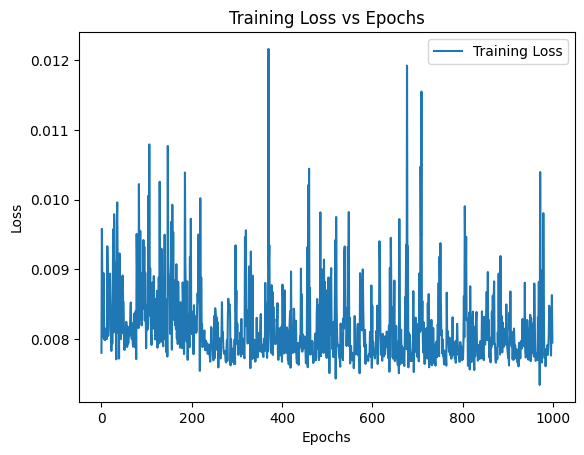

In [10]:
plt.plot(history.history['loss'], label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

### Visualize Training Loss
Plot the training loss over epochs to evaluate convergence of the model.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


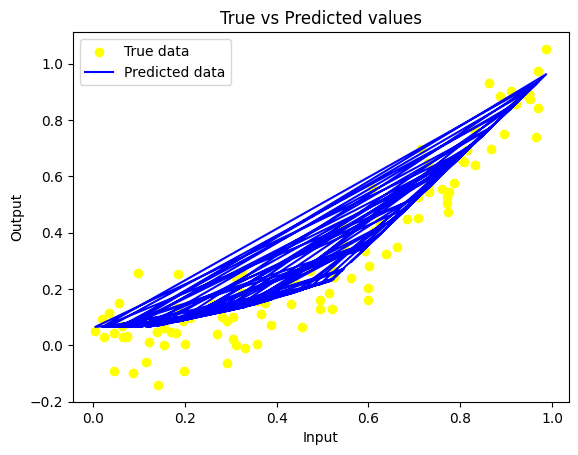

In [11]:
# Make predictions
y_pred = model.predict(X)

# Plot true vs predicted values
plt.scatter(X, y, color='yellow', label='True data')
plt.plot(X, y_pred, color='blue', label='Predicted data')
plt.title('True vs Predicted values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

### 4D Visualization of Model Performance
Visualize input, true output, and predicted output in 3D space, with error represented by color.


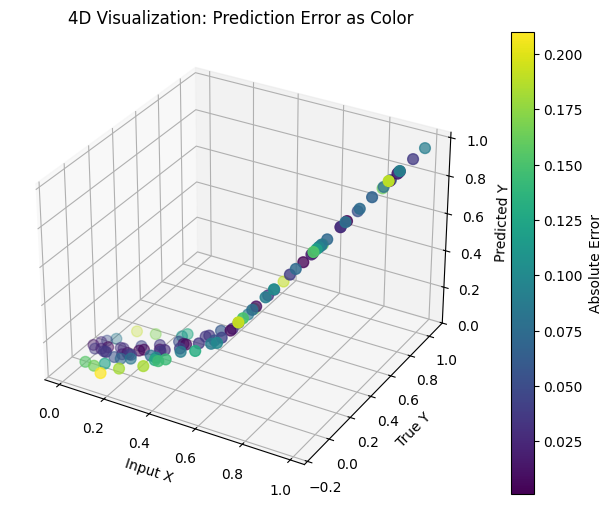

In [12]:
# 4D Visualization: input (X), true output (y), predicted output (y_pred), color = error
from mpl_toolkits.mplot3d import Axes3D

# Compute absolute error
errors = np.abs(y_pred - y).flatten()

# 4D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X.flatten(), y.flatten(), y_pred.flatten(), c=errors, cmap='viridis', s=60)
ax.set_xlabel("Input X")
ax.set_ylabel("True Y")
ax.set_zlabel("Predicted Y")
ax.set_title("4D Visualization: Prediction Error as Color")

cbar = fig.colorbar(sc)
cbar.set_label("Absolute Error")

plt.show()
